Steps to Perform:

Data Preparation:

Import necessary Python libraries (for example, Pandas, NumPy, Matplotlib, SciPy)
Load the "Retail_Store_Data.csv" dataset
Perform basic data exploration (for example, view the first few rows, check for null values)
Bernoulli Distribution:

Create a binary variable representing whether a customer spent more than 30 minutes in the store (1 for Yes, 0 for No).
Analyze this variable using Bernoulli distribution
Binomial Distribution:

Consider 10 random visits; analyze the number of visits where customers spent over $100 using the binomial distribution
Poisson Distribution:

Analyze the number of customers visiting the store per hour. Assume the store's data indicates an average of 15 customers per hour
Normal Distribution:

Examine the Purchase_Amount variable. Check if it follows a normal distribution. Calculate its mean and standard deviation.
Uniform Distribution:

Analyze the Visit_Duration variable under the assumption that all time intervals are equally likely within the store’s opening hours

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson, norm, uniform

In [3]:
data = pd.read_csv('Retail_Store_Data.csv')

In [3]:
# Perform basic data exploration
print(data.head())  # View the first few rows
print(data.describe())  # Summary statistics

   Customer_ID  Purchase_Amount  Visit_Duration  Items_Purchased  \
0            1       174.835708       28.423084                2   
1            2       143.086785       21.502462                7   
2            3       182.384427       80.007327                5   
3            4       226.151493       87.712330                5   
4            5       138.292331       13.474476                8   

  Store_Section   Weekday  
0     Groceries   Tuesday  
1   Electronics    Sunday  
2       Apparel  Saturday  
3     Groceries  Saturday  
4     Groceries   Tuesday  
       Customer_ID  Purchase_Amount  Visit_Duration  Items_Purchased
count  1000.000000      1000.000000     1000.000000      1000.000000
mean    500.500000       150.966603       65.401369         4.929000
std     288.819436        48.960797       31.719252         2.096749
min       1.000000       -12.063367       10.354009         0.000000
25%     250.750000       117.620485       37.191903         3.000000
50%     5

In [4]:
# Create binary variable
data['Spent_30_Minutes'] = np.where(data['Visit_Duration'] > 30, 1, 0)

# Calculate the probability of spending more than 30 minutes
p = data['Spent_30_Minutes'].mean()

# Bernoulli distribution
bernoulli_dist = bernoulli(p)

# Probability mass function
pmf = bernoulli_dist.pmf([0, 1])
print("mean", p)
print(f'Probability of spending <= 30 minutes: {pmf[0]}')
print(f'Probability of spending > 30 minutes: {pmf[1]}')


mean 0.813
Probability of spending <= 30 minutes: 0.18700000000000006
Probability of spending > 30 minutes: 0.813


In [5]:
# Create binary variable for spending over $100
data['Spent_Over_100'] = np.where(data['Purchase_Amount'] > 100, 1, 0)

# Probability of spending over $100
p_over_100 = data['Spent_Over_100'].mean()
print(p_over_100)
# Number of trials
n_trials = 10

# Binomial distribution
binom_dist = binom(n_trials, p_over_100)

# Probability mass function for each possible number of successes
binom_pmf = [binom_dist.pmf(k) for k in range(n_trials + 1)]
print(f'Binomial PMF for spending over $100 in 10 visits: {binom_pmf}')


0.853
Binomial PMF for spending over $100 in 10 visits: [4.711653532607697e-09, 2.734041131506366e-07, 7.139195158698772e-06, 0.00011047135547156544, 0.0011218103121100644, 0.007811462826366401, 0.03777311672840446, 0.12524963486619625, 0.2725457615838404, 0.3514460085124955, 0.20393431650418964]


In [8]:
# Given average number of customers per hour
lambda_customers = 15

# Poisson distribution
poisson_dist = poisson(lambda_customers)

# Probability mass function for a range of customer counts
poisson_pmf = [poisson_dist.pmf(k) for k in range(30)]  # Example for 0 to 29 customers
print(f'Poisson PMF for number of customers per hour: {poisson_pmf}')
print(poisson_dist.pmf(1))

Poisson PMF for number of customers per hour: [3.059023205018258e-07, 4.588534807527389e-06, 3.4414011056455366e-05, 0.00017207005528227702, 0.000645262707308539, 0.0019357881219256158, 0.004839470304814035, 0.010370293510315794, 0.019444300331842114, 0.03240716721973691, 0.04861075082960534, 0.06628738749491639, 0.08285923436864541, 0.09560680888689863, 0.1024358666645339, 0.1024358666645339, 0.09603362499800054, 0.08473555146882411, 0.07061295955735367, 0.055747073334752824, 0.04181030500106466, 0.02986450357218907, 0.02036216152649248, 0.013279670560755972, 0.00829979410047246, 0.004979876460283485, 0.0028730056501635464, 0.001596114250090871, 0.0008550612054058132, 0.00044227303727887516]
4.588534807527389e-06


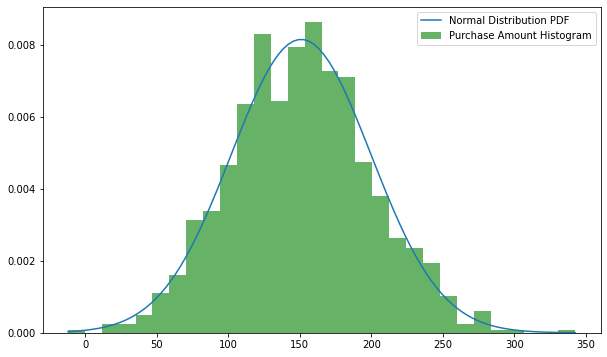

In [8]:
# Calculate mean and standard deviation
mean_purchase = data['Purchase_Amount'].mean()
std_purchase = data['Purchase_Amount'].std()

# Normal distribution
normal_dist = norm(mean_purchase, std_purchase)

# Generate a range of values
purchase_values = np.linspace(data['Purchase_Amount'].min(), data['Purchase_Amount'].max(), 100)

# Probability density function
normal_pdf = normal_dist.pdf(purchase_values)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(purchase_values, normal_pdf, label='Normal Distribution PDF')
plt.hist(data['Purchase_Amount'], bins=30, density=True, alpha=0.6, color='g', label='Purchase Amount Histogram')
plt.legend()
plt.show()


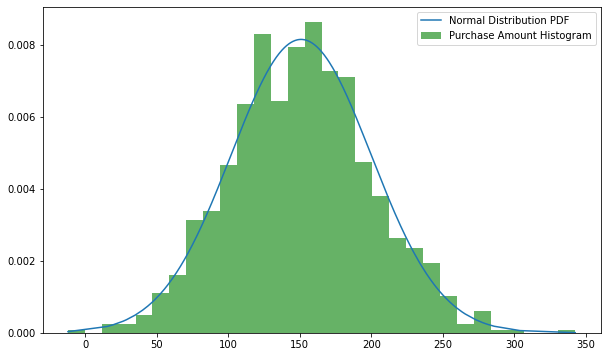

In [4]:
# Calculate mean and standard deviation
mean_purchase = data['Purchase_Amount'].mean()
std_purchase = data['Purchase_Amount'].std()

# Normal distribution
normal_dist = norm(mean_purchase, std_purchase)

# Generate a range of values
purchase_values = data['Purchase_Amount'].sort_values().reset_index(drop=True)

# Probability density function
normal_pdf = normal_dist.pdf(purchase_values)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(purchase_values, normal_pdf, label='Normal Distribution PDF')
plt.hist(data['Purchase_Amount'], bins=30, density=True, alpha=0.6, color='g', label='Purchase Amount Histogram')
plt.legend()
plt.show()


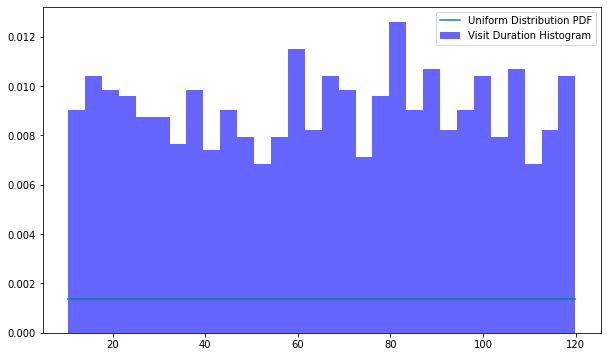

In [5]:


# Generate a range of values
visit_duration_values = data['Visit_Duration']

# Probability density function
uniform_pdf = uniform_dist.pdf(visit_duration_values)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(visit_duration_values, uniform_pdf, label='Uniform Distribution PDF')
plt.hist(data['Visit_Duration'], bins=30, density=True, alpha=0.6, color='b', label='Visit Duration Histogram')
plt.legend()
plt.show()


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import binom

# Load the dataset
data = pd.read_csv('Retail_Store_Data.csv')

# Create binary variable for spending over $100
data['Spent_Over_100'] = np.where(data['Purchase_Amount'] > 100, 1, 0)

# Probability of spending over $100
p_over_100 = data['Spent_Over_100'].mean()

# Number of trials
n_trials = 10

# Binomial distribution
binom_dist = binom(n_trials, p_over_100)
print(p_over_100)
# Probability mass function for k = 1
k = 1
prob_k_1 = binom_dist.pmf(k)
print(f'Probability of exactly 1 visit out of 10 resulting in spending over $100: {prob_k_1}')


0.853
Probability of exactly 1 visit out of 10 resulting in spending over $100: 2.734041131506366e-07
